<a href="https://colab.research.google.com/github/Ghonem22/Learning/blob/main/Python3%20object%20oriented%20programming/Ch4%2C%20Expecting%20the%20Unexpected/Expecting_the_Unexpected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch4: Expecting the Unexpected


### What will we cover in this chapter?

- How to cause an exception to occur

- How to recover when an exception has occurred

- How to handle different exception types in different ways

- Creating new types of exception

- Using the exception syntax for flow control

## Types of Errors

In [ ]:
# SyntaxError
print "hello world"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("hello world")? (Temp/ipykernel_7116/3454453950.py, line 2)

In [ ]:
# ZeroDivisionError:
x = 5 / 0

ZeroDivisionError: division by zero

In [ ]:
# IndexError:
lst = [1,2,3]
print(lst[3])

IndexError: list index out of range

In [ ]:
# TypeError:
lst + 2

TypeError: can only concatenate list (not "int") to list

In [ ]:
# AttributeError:
lst.add

AttributeError: 'list' object has no attribute 'add'

In [ ]:
# KeyError:
d = {'a': 'hello'}
d['b']

KeyError: 'b'

In [ ]:
# NameError:
print(this_is_not_a_var)

NameError: name 'this_is_not_a_var' is not defined

### Raising an exception

Raising an exception stops all execution right up through the function call stack until it is either handled or forces the interpreter to exit.

In [ ]:
class EvenOnly(list):
    '''
    We override append method here, to append only even int numbers.
    
    Notice That we raised:
    1- TypeError if the user tried to append any values except int num
    2- ValueError if the user tried to append odd number.
    '''
    def append(self, integer):
        if not isinstance(integer, int):
            raise TypeError("Only integers can be added")
        if integer % 2:
            raise ValueError("Only even numbers can be added")
        super().append(integer)

In [ ]:
x = EvenOnly()
x.append(4)

In [ ]:
x.append(14.2)

TypeError: Only integers can be added

In [ ]:
x.append(3)

ValueError: Only even numbers can be added

### Handling exceptions

**The code stops excution after an Error is raised, which we will notice in the example below:**

The first line in  no_return() is printed, then the Exception is raised, which stop stop excution and move to except phrase.

In [ ]:
def no_return():
    print("I am about to raise an exception")
    raise Exception("This is always raised")
    print("This line will never execute")
    return "I won't be returned"

'''
if Try met any Exception from any kind, it will stop excution
and excpet will continue excution.

We can add specific type of Exceptions after except. but in this case, excpet
will continue excution if this Exceptions is raised only.
'''
try:
    no_return()
except:
    print("I caught an exception")
    print("executed after the exception")

I am about to raise an exception
I caught an exception
executed after the exception


In [ ]:
def funny_division(divider):
    try:
        return 100 / divider
    except ZeroDivisionError:
        return "Zero is not a good idea!"

print(funny_division(0))
print(funny_division(50.0))

'''
We didn't include TypeError after except, So this line won't Work properly As
you will see
'''
print(funny_division("hello"))

Zero is not a good idea!
2.0


TypeError: unsupported operand type(s) for /: 'int' and 'str'

If we had used an empty except clause that didn't specify a ZeroDivisionError, it would have accused us of dividing by zero when we sent it a string

We can even catch two or more different exceptions and handle them with the same code.

In [ ]:
def funny_division2(anumber):
    try:
        if anumber == 13:
            raise ValueError("13 is an unlucky number")
        return 100 / anumber
    except (ZeroDivisionError, TypeError):
        return "Enter a number other than zero"
'''
num 13 will raise ValueError which isn't included with except,
So ValueError will be raised when we try to use 13
'''
for val in (0, "hello", 50.0, 13):
    print("Testing {}:".format(val), end=" ")
    print(funny_division2(val))

Testing 0: Enter a number other than zero
Testing hello: Enter a number other than zero
Testing 50.0: 2.0
Testing 13: 

ValueError: 13 is an unlucky number

Sometimes, when we catch an exception, we need a reference to the Exception object itself. This most often happens when we define our own exceptions with custom arguments, but can also be relevant with standard exceptions.

Most exception classes accept a set of arguments in their constructor, and we might want to access those attributes in the exception handler. 

If we define our own exception class, we can even call custom methods on it when we catch it. The syntax for capturing an exception as a variable uses the as keyword:

In [ ]:
try:
    raise ValueError("This is an argument")
except ValueError as e:
    # it prints out the string argument that we passed into ValueError upon initialization.
    print(e.args)

('This is an argument',)


#### Two more keywords: finally and else, can provide the missing pieces.

The following example randomly picks an exception to throw and raises it. Then some not-so-complicated exception handling code is run that illustrates the newly introduced syntax:

In [ ]:
import random
some_exceptions = [ValueError, TypeError, IndexError, None]

try:
    choice = random.choice(some_exceptions)
    print("raising {}".format(choice))
    if choice:
        raise choice("An error")
except ValueError:
    print("Caught a ValueError")
except TypeError:
    print("Caught a TypeError")
except Exception as e:
    print("Caught some other error: %s" %
    ( e.__class__.__name__))
else:
    print("This code called if there is no exception")
finally:
    print("This cleanup code is always called")

raising <class 'ValueError'>
Caught a ValueError
This cleanup code is always called


As The Print phrases illistrate: 

- else statement is executed if there is no exception.
- finally statement is always executed which is extremely useful when we need to perform certain tasks after our code has finished running As:

    1. Cleaning up an open database connection
    2. Closing an open file
    3. Sending a closing handshake over the network

## The exception hierarchy

### To inspect Base classes

In [ ]:
import inspect
inspect.getmro(Exception)

(Exception, BaseException, object)

In [ ]:
inspect.getmro(SystemExit), inspect.getmro(KeyboardInterrupt)

((SystemExit, BaseException, object),
 (KeyboardInterrupt, BaseException, object))

In [ ]:
inspect.getmro(ValueError), inspect.getmro(TypeError)

((ValueError, Exception, BaseException, object),
 (TypeError, Exception, BaseException, object))

* Exception itself actually inherits from a class called BaseException

* There are two key exceptions, SystemExit and KeyboardInterrupt, that derive directly from BaseException instead of Exception:

1. The SystemExit exception is raised whenever the program exits naturally.
    Typically because we called the sys. exit function somewhere in our code (for example, when the user selected an exit menu item, clicked the "close" button on a window, or entered a command to shut down a server).

    The exception is designed to allow us to clean up code before the program ultimately exits. So we generally don't need to handle it explicitly (because
    cleanup code happens inside a finally clause).
    
2. KeyboardInterrupt (normally, Ctrl + C): when the user explicitly interrupts program execution
        
    Also, like SystemExit, it should handle any cleanup tasks inside finally blocks.
    
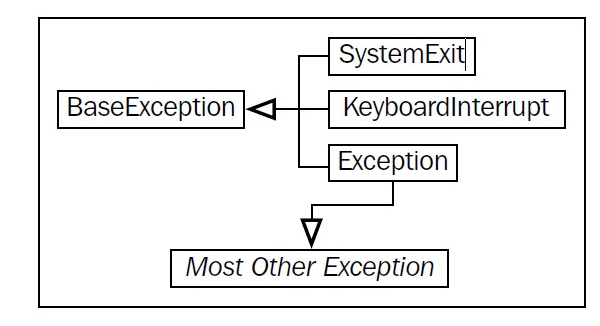

* if we use  except clause without specifying any type of exception,  it will catch all subclasses of BaseException; including the two special ones.

* If you want to catch all exceptions other than SystemExit and KeyboardInterrupt, explicitly catch Exception.

* use except BaseException: to catch all exceptions. to tell reader that you are intentionally handling the special case exceptions

## Defining our own exceptions

Here's a simple exception we might use in a banking application:

In [ ]:
class InvalidWithdrawal(Exception):
    pass
raise InvalidWithdrawal("You don't have $50 in your account")

InvalidWithdrawal: You don't have $50 in your account

In [ ]:
class InvalidWithdrawal(Exception):
    def __init__(self, balance, amount):
        super().__init__("account doesn't have ${}".format(
        amount))
        self.amount = amount
        self.balance = balance
        
    def overage(self):
        return self.amount - self.balance

In [ ]:
raise InvalidWithdrawal(20,50)

InvalidWithdrawal: account doesn't have $50

In [ ]:
try:
    raise InvalidWithdrawal(25, 50)
    
except InvalidWithdrawal as e:
    print("I'm sorry, but your withdrawal is more than your balance by ${}".format(e.overage()))

I'm sorry, but your withdrawal is more than your balance by $25


**The utility of custom exceptions truly comes to light when creating a framework, library, or API that is intended for access by other programmers.**

## Case study

**Designing Basic authentication and authorization system with some administrative features.**

* User class that stores the username and an encrypted password. This class will also allow a user to log in by checking whether a supplied password is valid.

* We probably won't need a Permission class, as those can just be strings mapped to a list of users using a dictionary.
* central Authenticator class that handles user management and logging in or out.
* Authorizor class that deals with permissions and checking whether a user can perform an activity.

In [ ]:
import hashlib

class User:
    def __init__(self, username, password):
        
        self.username = username
        self.password = self._encrypt_pw(password)
        self.is_logged_in = False
        
    def _encrypt_pw(self, password):
        hash_string = (self.username + password)
        hash_string = hash_string.encode("utf8")
        return hashlib.sha256(hash_string).hexdigest()
    
    def check_password(self, password):
        encrypted = self._encrypt_pw(password)
        return encrypted == self.password
    

**Let's try this class:**

In [ ]:
x = User("Ghonem", "Ghonem_pass")

In [ ]:
x.check_password("Ghonem_pass")

True

**we'll need a UsernameAlreadyExists exception. Also, for security's sake, we should probably raise an exception if the password is too short. Both of these exceptions will extend AuthException**

In [ ]:
class AuthException(Exception):
    def __init__(self, username, user=None):
        super().__init__(username, user)
        
        # instance of the User class associated with that username (optional)
        self.username = username       
        self.user = user
        
        
class UsernameAlreadyExists(AuthException):
    pass


class PasswordTooShort(AuthException):
    pass


class InvalidUsername(AuthException):
    pass


class InvalidPassword(AuthException):
    pass

class PermissionError(AuthException):
    pass
                      
class NotLoggedInError(AuthException):
    pass
                      
                      
class NotPermittedError(AuthException):
    pass

In [ ]:
class Authenticator:
    def __init__(self):
        '''Construct an authenticator to manage users logging in and out.'''
        self.users = {}
        
    def add_user(self, username, password):
        if username in self.users:
            raise UsernameAlreadyExists(username)
        if len(password) < 6:
            raise PasswordTooShort(username)
        self.users[username] = User(username, password)
        
        
    def login(self, username, password):
        try:
            user = self.users[username]
            
        except KeyError:
            raise InvalidUsername(username)
            
        if not user.check_password(password):
            raise InvalidPassword(username, user)
            
        user.is_logged_in = True
        return True
    
    def is_logged_in(self, username):
        if username in self.users:
            return self.users[username].is_logged_in
        return False

In [ ]:
authenticator = Authenticator()

**We don't need here to add a seperate class for permission. if we did, it will contain just attributes without methods. SO, we will use just a dictionary.** 

In [ ]:
class Authorizor:
    
    def __init__(self, authenticator):
        
        self.authenticator = authenticator      # Composition
        self.permissions = {}
    
    def add_permission(self, perm_name):
        #Create a new permission that users can be added to
        try:
            perm_set = self.permissions[perm_name]
        # If there is no permission called perm_name, we will add one 
        except KeyError:
            self.permissions[perm_name] = set()
        else:
            raise PermissionError("Permission Exists")
        
    def permit_user(self, perm_name, username):
        #Grant the given permission to the user
        try:
            perm_set = self.permissions[perm_name]
        except KeyError:
            raise PermissionError("Permission does not exist")
        else:
            if username not in self.authenticator.users:
                raise InvalidUsername(username)
            perm_set.add(username)

            
    def check_permission(self, perm_name, username):
        # The user should be logged in to check his permission
        if not self.authenticator.is_logged_in(username):
            raise NotLoggedInError(username)
        try:
            perm_set = self.permissions[perm_name]
        except KeyError:
            raise PermissionError("Permission does not exist")
        else:
            if username not in perm_set:
                raise NotPermittedError(username)
            else:
                return True

In [ ]:
auth = Authorizor(authenticator)

In [ ]:
auth.authenticator.add_user("Ghonem", "Ghonem_pass")

In [ ]:
auth.add_permission("paint")

In [ ]:
# This will raise NotLoggedInError because the user called Ghonem isn't logged in.
auth.check_permission("paint", "Ghonem")

NotLoggedInError: ('Ghonem', None)

In [ ]:
auth.authenticator.is_logged_in("Ghonem")

False

In [ ]:
auth.authenticator.login("Ghonem", "Ghonem_pass")

True

In [ ]:
'''
This will raise an error because we added paint permission, 
but we didn't permit the user "Ghonem" 
'''
auth.check_permission("paint", "Ghonem")

NotPermittedError: ('Ghonem', None)

In [ ]:
auth.permit_user("paint", "Ghonem")

In [ ]:
auth.check_permission("paint", "Ghonem")

True

**We will now build an object manager that manage these classes to convert that into a simple system :**



In [ ]:
class Editor:
    def __init__(self):
        self.username = None
        self.menu_map = {
                    "login": self.login,
                    "test": self.test,
                    "change": self.change,
                    "quit": self.quit
        }
    
    def login(self):
        logged_in = False
        while not logged_in:
            username = input("username: ")
            password = input("password: ") 
            
            try:
                logged_in = auth.authenticator.login(username, password)
                print("successful")
            except InvalidUsername:
                print("Sorry, that username does not exist")
            
            except InvalidPassword:
                print("Sorry, your password isn't correct")
                
            else:
                self.username = username
                
    def is_permitted(self, permission):
        try:
            auth.check_permission(permission, self.username)
            
        except NotLoggedInError as e:
            print("{} is not logged in".format(e.username))
            return False
        except NotPermittedError as e:
            print("{} cannot {}".format(e.username, permission))
            return False
        else:
            return True
        
    def test(self):
        if self.is_permitted("test program"):
            print("Testing program now...")
            
    def change(self):
        if self.is_permitted("change program"):
            print("Changing program now...")
            
    def quit(self):
        raise SystemExit()
        
    def menu(self):
        try:
            answer = ""
            while True:
                print("""
                Please enter a command:
                \tlogin\tLogin
                \ttest\tTest the program
                \tchange\tChange the program
                \tquit\tQuit
                """)
                
                answer = input("enter a command: ").lower()
                try:
                    func = self.menu_map[answer]
                except KeyError:
                    print("{} is not a valid option".format(answer))
                else:
                    func()
        finally:
            print("Thank you for testing the auth module")


In [ ]:
Editor().menu()


                Please enter a command:
                	login	Login
                	test	Test the program
                	change	Change the program
                	quit	Quit
                
enter a command: login
username: Ghonem
password: Ghonem_pass
successful

                Please enter a command:
                	login	Login
                	test	Test the program
                	change	Change the program
                	quit	Quit
                
enter a command: quit
Thank you for testing the auth module


SystemExit: 

C:\Users\aghon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
